In [80]:
import re

<link href="style.css" rel="stylesheet"></link>
<main>
<article class="day-desc"><h2>--- Day 20: Pulse Propagation ---</h2><p>With your help, the Elves manage to find the right parts and fix all of the machines. Now, they just need to send the command to boot up the machines and get the sand flowing again.</p>
<p>The machines are far apart and wired together with long <em>cables</em>. The cables don't connect to the machines directly, but rather to communication <em>modules</em> attached to the machines that perform various initialization tasks and also act as communication relays.</p>
<p>Modules communicate using <em>pulses</em>. Each pulse is either a <em>high pulse</em> or a <em>low pulse</em>. When a module sends a pulse, it sends that type of pulse to each module in its list of <em>destination modules</em>.</p>
<p>There are several different types of modules:</p>
<p><em>Flip-flop</em> modules (prefix <code>%</code>) are either <em>on</em> or <em>off</em>; they are initially <em>off</em>. If a flip-flop module receives a high pulse, it is ignored and nothing happens. However, if a flip-flop module receives a low pulse, it <em>flips between on and off</em>. If it was off, it turns on and sends a high pulse. If it was on, it turns off and sends a low pulse.</p>
<p><em>Conjunction</em> modules (prefix <code>&amp;</code>) <em>remember</em> the type of the most recent pulse received from <em>each</em> of their connected input modules; they initially default to remembering a <em>low pulse</em> for each input. When a pulse is received, the conjunction module first updates its memory for that input. Then, if it remembers <em>high pulses</em> for all inputs, it sends a <em>low pulse</em>; otherwise, it sends a <em>high pulse</em>.</p>
<p>There is a single <em>broadcast module</em> (named <code>broadcaster</code>). When it receives a pulse, it sends the same pulse to all of its destination modules.</p>
<p>Here at Desert Machine Headquarters, there is a module with a single button on it called, aptly, the <em>button module</em>. When you push the button, a single <em>low pulse</em> is sent directly to the <code>broadcaster</code> module.</p>
<p>After pushing the button, you must wait until all pulses have been delivered and fully handled before pushing it again. Never push the button if modules are still processing pulses.</p>
<p>Pulses are always processed <em>in the order they are sent</em>. So, if a pulse is sent to modules <code>a</code>, <code>b</code>, and <code>c</code>, and then module <code>a</code> processes its pulse and sends more pulses, the pulses sent to modules <code>b</code> and <code>c</code> would have to be handled first.</p>
<p>The module configuration (your puzzle input) lists each module. The name of the module is preceded by a symbol identifying its type, if any. The name is then followed by an arrow and a list of its destination modules. For example:</p>
<pre><code>broadcaster -&gt; a, b, c
%a -&gt; b
%b -&gt; c
%c -&gt; inv
&amp;inv -&gt; a
</code></pre>
<p>In this module configuration, the broadcaster has three destination modules named <code>a</code>, <code>b</code>, and <code>c</code>. Each of these modules is a flip-flop module (as indicated by the <code>%</code> prefix). <code>a</code> outputs to <code>b</code> which outputs to <code>c</code> which outputs to another module named <code>inv</code>. <code>inv</code> is a conjunction module (as indicated by the <code>&amp;</code> prefix) which, because it has only one input, acts like an <span title="This puzzle originally had a separate inverter module type until I realized it was just a worse conjunction module.">inverter</span> (it sends the opposite of the pulse type it receives); it outputs to <code>a</code>.</p>
<p>By pushing the button once, the following pulses are sent:</p>
<pre><code>button -low-&gt; broadcaster
broadcaster -low-&gt; a
broadcaster -low-&gt; b
broadcaster -low-&gt; c
a -high-&gt; b
b -high-&gt; c
c -high-&gt; inv
inv -low-&gt; a
a -low-&gt; b
b -low-&gt; c
c -low-&gt; inv
inv -high-&gt; a
</code></pre>
<p>After this sequence, the flip-flop modules all end up <em>off</em>, so pushing the button again repeats the same sequence.</p>
<p>Here's a more interesting example:</p>
<pre><code>broadcaster -&gt; a
%a -&gt; inv, con
&amp;inv -&gt; b
%b -&gt; con
&amp;con -&gt; output
</code></pre>
<p>This module configuration includes the <code>broadcaster</code>, two flip-flops (named <code>a</code> and <code>b</code>), a single-input conjunction module (<code>inv</code>), a multi-input conjunction module (<code>con</code>), and an untyped module named <code>output</code> (for testing purposes). The multi-input conjunction module <code>con</code> watches the two flip-flop modules and, if they're both on, sends a <em>low pulse</em> to the <code>output</code> module.</p>
<p>Here's what happens if you push the button once:</p>
<pre><code>button -low-&gt; broadcaster
broadcaster -low-&gt; a
a -high-&gt; inv
a -high-&gt; con
inv -low-&gt; b
con -high-&gt; output
b -high-&gt; con
con -low-&gt; output
</code></pre>
<p>Both flip-flops turn on and a low pulse is sent to <code>output</code>! However, now that both flip-flops are on and <code>con</code> remembers a high pulse from each of its two inputs, pushing the button a second time does something different:</p>
<pre><code>button -low-&gt; broadcaster
broadcaster -low-&gt; a
a -low-&gt; inv
a -low-&gt; con
inv -high-&gt; b
con -high-&gt; output
</code></pre>
<p>Flip-flop <code>a</code> turns off! Now, <code>con</code> remembers a low pulse from module <code>a</code>, and so it sends only a high pulse to <code>output</code>.</p>
<p>Push the button a third time:</p>
<pre><code>button -low-&gt; broadcaster
broadcaster -low-&gt; a
a -high-&gt; inv
a -high-&gt; con
inv -low-&gt; b
con -low-&gt; output
b -low-&gt; con
con -high-&gt; output
</code></pre>
<p>This time, flip-flop <code>a</code> turns on, then flip-flop <code>b</code> turns off. However, before <code>b</code> can turn off, the pulse sent to <code>con</code> is handled first, so it <em>briefly remembers all high pulses</em> for its inputs and sends a low pulse to <code>output</code>. After that, flip-flop <code>b</code> turns off, which causes <code>con</code> to update its state and send a high pulse to <code>output</code>.</p>
<p>Finally, with <code>a</code> on and <code>b</code> off, push the button a fourth time:</p>
<pre><code>button -low-&gt; broadcaster
broadcaster -low-&gt; a
a -low-&gt; inv
a -low-&gt; con
inv -high-&gt; b
con -high-&gt; output
</code></pre>
<p>This completes the cycle: <code>a</code> turns off, causing <code>con</code> to remember only low pulses and restoring all modules to their original states.</p>
<p>To get the cables warmed up, the Elves have pushed the button <code>1000</code> times. How many pulses got sent as a result (including the pulses sent by the button itself)?</p>
<p>In the first example, the same thing happens every time the button is pushed: <code>8</code> low pulses and <code>4</code> high pulses are sent. So, after pushing the button <code>1000</code> times, <code>8000</code> low pulses and <code>4000</code> high pulses are sent. Multiplying these together gives <code><em>32000000</em></code>.</p>
<p>In the second example, after pushing the button <code>1000</code> times, <code>4250</code> low pulses and <code>2750</code> high pulses are sent. Multiplying these together gives <code><em>11687500</em></code>.</p>
<p>Consult your module configuration; determine the number of low pulses and high pulses that would be sent after pushing the button <code>1000</code> times, waiting for all pulses to be fully handled after each push of the button. <em>What do you get if you multiply the total number of low pulses sent by the total number of high pulses sent?</em></p>
</article>
</main>


In [81]:
from __future__ import annotations

from collections import defaultdict, deque
from typing import override


class Pulse:
    log = False
    queue = deque([])
    low_send = 0
    high_send = 0
    stop = False
    cycle = 0

    def __init__(self, fr: Module, to: Module):
        self.fr = fr
        self.to = to

    def send(self):
        raise NotImplemented

    @classmethod
    def add(cls, puls: Pulse):
        cls.queue.append(puls)

    @classmethod
    def has_pulses(cls):
        return len(cls.queue) > 0 and not Pulse.stop

    @classmethod
    def process(cls):
        for _ in range(len(cls.queue)):
            puls = cls.queue.popleft()
            puls.send()
            if Pulse.stop:
                return


class High(Pulse):
    @override
    def send(self):
        if Pulse.log:
            print(f"{self.fr.name} -high-> {self.to.name}")
        self.to.receive_high_pulse(self.fr)
        Pulse.high_send += 1


class Low(Pulse):
    @override
    def send(self):
        if Pulse.log:
            print(f"{self.fr.name} -low-> {self.to.name}")
        self.to.receive_low_pulse(self.fr)
        Pulse.low_send += 1


class Module:
    sender_received_from = defaultdict(
        lambda: defaultdict(lambda: defaultdict(list[int]))
    )
    # follow = {"tn", "lv", "st", "dt"}
    follow = ["lv"]

    def __init__(self, name) -> None:
        self.destinations = []
        self.name = name

    def add_destination(self, dest: Module):
        dest.remember(self)
        self.destinations.append(dest)

    def send_hgh_pulse(self):
        for dest in self.destinations:
            Pulse.add(High(self, dest))

    def remember(self, sender: Module):
        ...

    def receive_high_pulse(self, sender: Module):
        if self.name in self.follow:
            self.sender_received_from[self.name][sender.name]["high"].append(
                Pulse.cycle
            )

    def send_low_pulse(self):
        for dest in self.destinations:
            Pulse.add(Low(self, dest))

    def receive_low_pulse(self, sender: Module):
        # if self.name in self.follow:
        #     self.sender_received_from[self.name][sender.name]["low"].append(Pulse.cycle)
        ...

    def __str__(self) -> str:
        return f"{type(self).__name__}[{self.name}]{self.destinations}"

    def __repr__(self) -> str:
        return self.__str__()


# Here at Desert Machine Headquarters, there is a module with a single button on it called,
# aptly, the button module.
# When you push the button, a single low pulse is sent directly to the broadcaster module.
class Button(Module):
    def push(self):
        self.send_low_pulse()


# There is a single broadcast module (named broadcaster).
# When it receives a pulse, it sends the same pulse to all of its destination modules.
class BroadCaster(Module):
    @override
    def receive_high_pulse(self, sender: Module):
        super().receive_high_pulse(sender)
        self.send_hgh_pulse()

    @override
    def receive_low_pulse(self, sender: Module):
        super().receive_low_pulse(sender)
        self.send_low_pulse()


# Flip-flop modules (prefix %) are either on or off; they are initially off.
# If a flip-flop module receives a high pulse, it is ignored and nothing happens.
# However, if a flip-flop module receives a low pulse, it flips between on and off.
# If it was off, it turns on and sends a high pulse. If it was on,
# it turns off and sends a low pulse.
class FlipFlop(Module):
    def __init__(self, name) -> None:
        super().__init__(name)
        self.on = False

    @override
    def receive_low_pulse(self, sender: Module):
        super().receive_low_pulse(sender)
        if self.on:
            self.send_low_pulse()
        else:
            self.send_hgh_pulse()
        self.on = not self.on


# Conjunction modules (prefix &) remember the type of the most recent pulse received
# from each of their connected input modules; they initially default to remembering a low
# pulse for each input. When a pulse is received, the conjunction module first updates
# its memory for that input. Then, if it remembers high pulses for all inputs,
# it sends a low pulse; otherwise, it sends a high pulse.
class Conjunction(Module):
    def __init__(self, name) -> None:
        super().__init__(name)
        self.last_received_pulse_is_high = {}

    @override
    def remember(self, sender: Module):
        self.last_received_pulse_is_high[sender.name] = False

    @override
    def receive_high_pulse(self, sender: Module):
        super().receive_high_pulse(sender)
        self.receive_pulse(sender, True)

    @override
    def receive_low_pulse(self, sender: Module):
        super().receive_low_pulse(sender)
        self.receive_pulse(sender, False)

    def receive_pulse(self, sender: Module, high_pulse: bool):
        self.last_received_pulse_is_high[sender.name] = high_pulse
        if all(self.last_received_pulse_is_high.values()):
            self.send_low_pulse()
        else:
            self.send_hgh_pulse()


class Untyped(Module):
    ...


config1 = """
broadcaster -> a, b, c
%a -> b
%b -> c
%c -> inv
&inv -> a
"""


def create_newtork(config: str):
    button = Button("button")
    nodes = {"button": button}
    steps = [("button", ["broadcaster"])]
    for line in config.strip().splitlines():
        name, dests = re.split(r"\s+->\s+", line)
        dests = [d.strip() for d in dests.split(",")]
        if name == "broadcaster":
            nodes[name] = BroadCaster(name)
        elif name.startswith("%"):
            name = name[1:]
            nodes[name] = FlipFlop(name)
        else:
            name = name[1:]
            nodes[name] = Conjunction(name)

        steps.append((name, dests))

    # print(f"{nodes=}")
    # print(f"{steps}")
    for name, dests in steps:
        for dest in dests:
            nodes[name].add_destination(nodes.get(dest, Untyped(dest)))
    return button


def process(config, number_of_times_pushed=1, log=False):
    Pulse.log = log
    Pulse.low_send, Pulse.high_send = 0, 0
    Pulse.stop = False
    Pulse.cycle = 0
    button = create_newtork(config)
    for _ in range(number_of_times_pushed):
        Pulse.cycle += 1
        button.push()
        while Pulse.has_pulses():
            Pulse.process()
        if Pulse.stop:
            break

    if log:
        print()
    print(
        f"{Pulse.low_send=} * {Pulse.high_send=} = {Pulse.low_send * Pulse.high_send}"
    )
    return Pulse.low_send * Pulse.high_send


process(config1, 1, True)
# button -low-> broadcaster
# broadcaster -low-> a
# broadcaster -low-> b
# broadcaster -low-> c
# a -high-> b
# b -high-> c
# c -high-> inv
# inv -low-> a
# a -low-> b
# b -low-> c
# c -low-> inv
# inv -high-> a

button -low-> broadcaster
broadcaster -low-> a
broadcaster -low-> b
broadcaster -low-> c
a -high-> b
b -high-> c
c -high-> inv
inv -low-> a
a -low-> b
b -low-> c
c -low-> inv
inv -high-> a

Pulse.low_send=8 * Pulse.high_send=4 = 32


32

In [82]:
config2 = """
broadcaster -> a
%a -> inv, con
&inv -> b
%b -> con
&con -> output
"""


process(config2, 4, True)

button -low-> broadcaster
broadcaster -low-> a
a -high-> inv
a -high-> con
inv -low-> b
con -high-> output
b -high-> con
con -low-> output
button -low-> broadcaster
broadcaster -low-> a
a -low-> inv
a -low-> con
inv -high-> b
con -high-> output
button -low-> broadcaster
broadcaster -low-> a
a -high-> inv
a -high-> con
inv -low-> b
con -low-> output
b -low-> con
con -high-> output
button -low-> broadcaster
broadcaster -low-> a
a -low-> inv
a -low-> con
inv -high-> b
con -high-> output

Pulse.low_send=17 * Pulse.high_send=11 = 187


187

In [83]:
assert process(config1, 1_000) == 32000000
assert process(config2, 1_000) == 11687500

Pulse.low_send=8000 * Pulse.high_send=4000 = 32000000
Pulse.low_send=4250 * Pulse.high_send=2750 = 11687500


In [84]:
with open("../input/day20.txt") as f:
    print(process(f.read(), 1_000))

Pulse.low_send=18238 * Pulse.high_send=44562 = 812721756
812721756


<link href="style.css" rel="stylesheet"></link>

<main>

<p>Your puzzle answer was <code>812721756</code>.</p><p class="day-success">The first half of this puzzle is complete! It provides one gold star: *</p>
<article class="day-desc"><h2 id="part2">--- Part Two ---</h2><p>The final machine responsible for moving the sand down to Island Island has a module attached named <code>rx</code>. The machine turns on when a <em>single low pulse</em> is sent to <code>rx</code>.</p>
<p>Reset all modules to their default states. Waiting for all pulses to be fully handled after each button press, <em>what is the fewest number of button presses required to deliver a single low pulse to the module named <code>rx</code>?</em></p>
</article>

</main>


In [85]:
from math import prod


class Untyped(Module):
    def __init__(self, name) -> None:
        super().__init__(name)

    @override
    def receive_low_pulse(self, sender: Module):
        super().receive_low_pulse(sender)
        print(f"{self.name} stopped")
        if self.name == "rx":
            self.received_from[sender.name] = ("low", Pulse.cycle)
            Pulse.stop = True


with open("../input/day20.txt") as f:
    print(process(f.read(), 10_000, False))
print("{")
for key, value in Module.sender_received_from.items():
    for k1, v1 in value.items():
        print(f"'{k1}' : ", end="")
        for k2, v2 in v1.items():
            print(v2, ",")
    print()
print("}")

high = {k: v["high"][0] for k, v in Module.sender_received_from["lv"].items()}

assert prod(high.values()) == 233338595643977

Pulse.low_send=183004 * Pulse.high_send=446793 = 81764906172
81764906172
{
'hh' : [3769, 7538] ,
'tn' : [3863, 7726] ,
'st' : [3929, 7858] ,
'dt' : [4079, 8158] ,

}


<link href="style.css" rel="stylesheet"></link>

<main>

<p>Your puzzle answer was <code>233338595643977</code>.</p><p class="day-success">Both parts of this puzzle are complete! They provide two gold stars: **</p>
<p>At this point, you should <a href="/2023">return to your Advent calendar</a> and try another puzzle.</p>
<p>If you still want to see it, you can <a href="20/input" target="_blank">get your puzzle input</a>.</p>
<p>You can also <span class="share">[Share<span class="share-content">on
  <a href="https://twitter.com/intent/tweet?text=I%27ve+completed+%22Pulse+Propagation%22+%2D+Day+20+%2D+Advent+of+Code+2023&amp;url=https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F20&amp;related=ericwastl&amp;hashtags=AdventOfCode" target="_blank">Twitter</a>
  <a href="javascript:void(0);" onclick="var ms; try{ms=localStorage.getItem('mastodon.server')}finally{} if(typeof ms!=='string')ms=''; ms=prompt('Mastodon Server?',ms); if(typeof ms==='string' &amp;&amp; ms.length){this.href='https://'+ms+'/share?text=I%27ve+completed+%22Pulse+Propagation%22+%2D+Day+20+%2D+Advent+of+Code+2023+%23AdventOfCode+https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F20';try{localStorage.setItem('mastodon.server',ms);}finally{}}else{return false;}" target="_blank">Mastodon</a></span>]</span> this puzzle.</p>
</main>


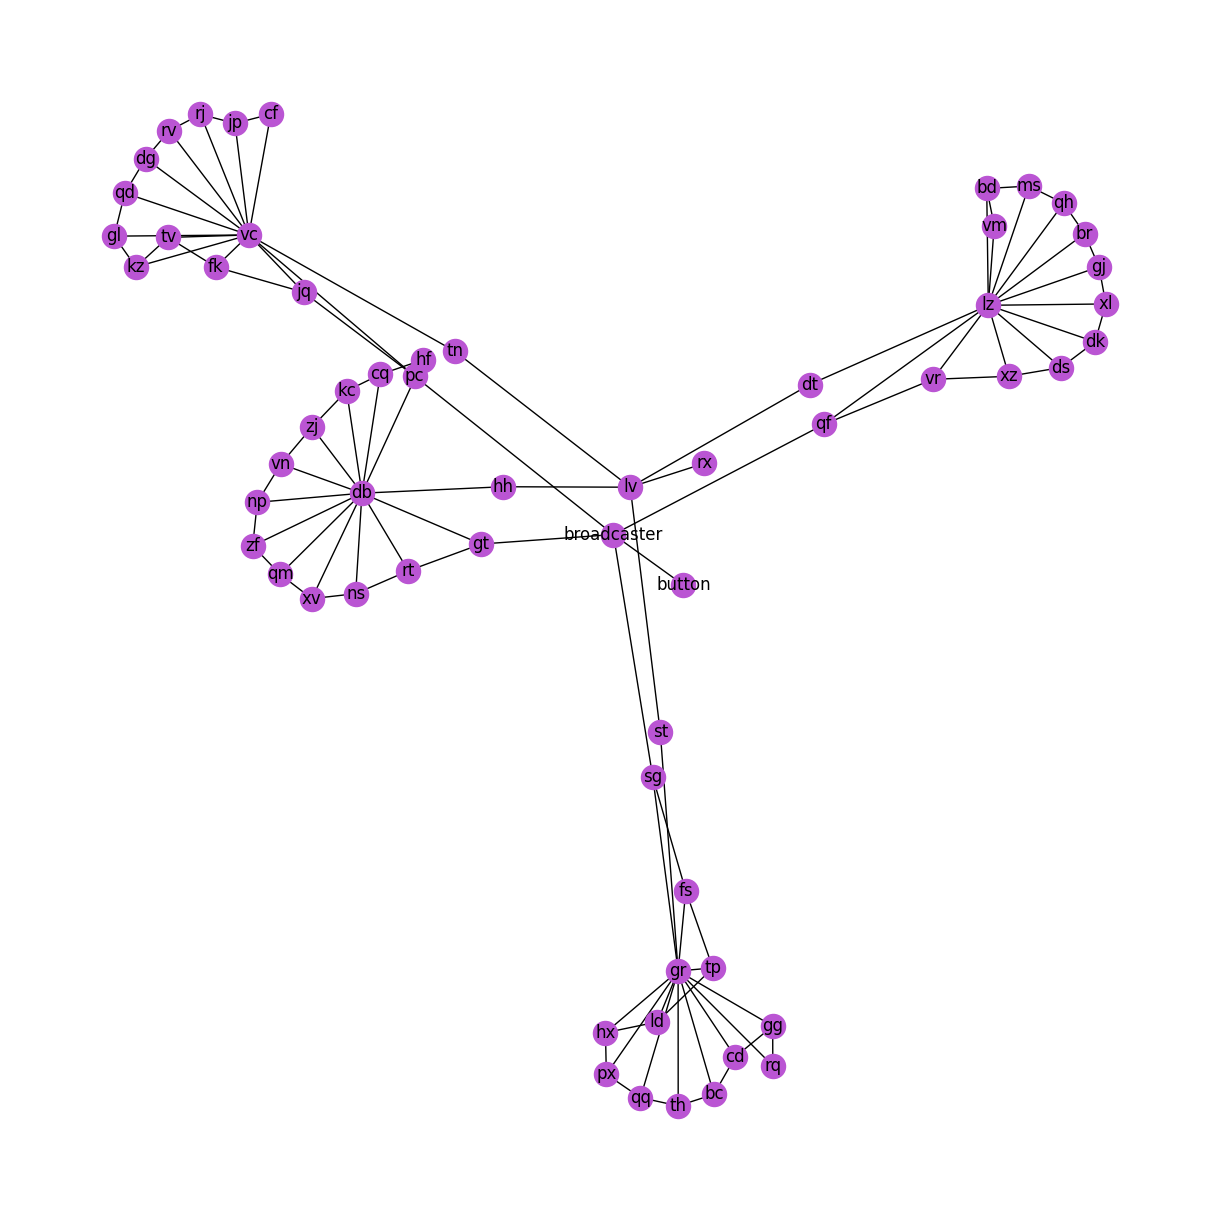

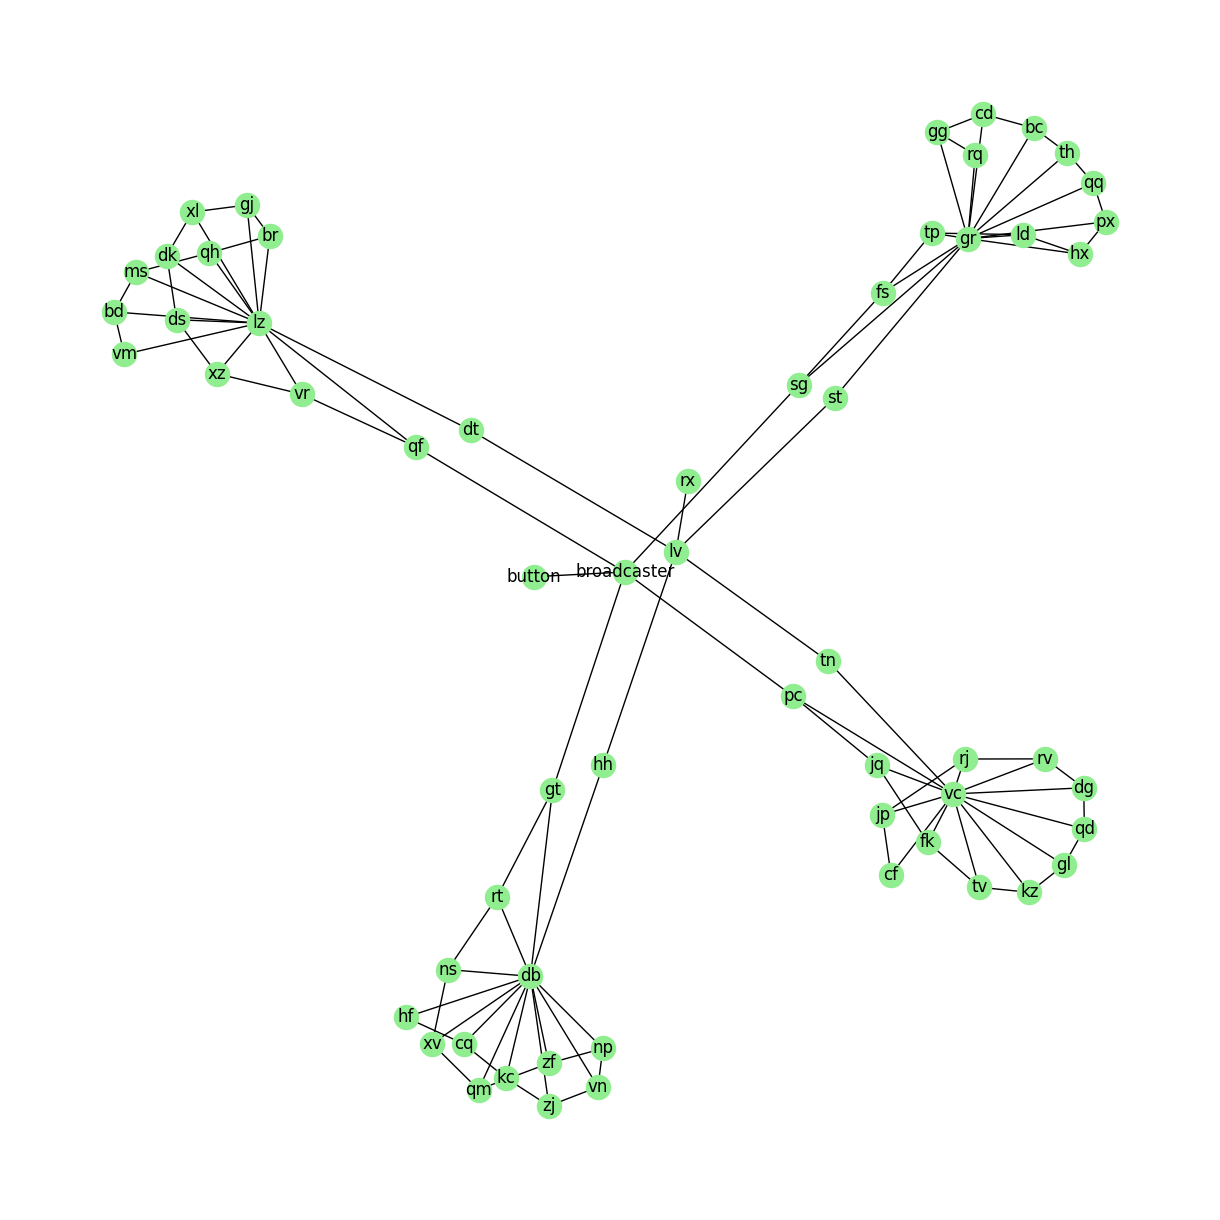

([Conjunction[lv][Untyped[rx][]]],
 [Conjunction[tn][Conjunction[lv][Untyped[rx][]]],
  Conjunction[st][Conjunction[lv][Untyped[rx][]]],
  Conjunction[dt][Conjunction[lv][Untyped[rx][]]],
  Conjunction[hh][Conjunction[lv][Untyped[rx][]]]])

In [90]:
from collections import defaultdict

import matplotlib.pyplot as plt
import networkx as nx
from tabulate import tabulate

with open("../input/day20.txt") as f:
    button = create_newtork(f.read())

graph = defaultdict(list[str])
inver = defaultdict(list[str])
queue = deque([button])
nodes = {}

while queue:
    for _ in range(len(queue)):
        node = queue.popleft()
        if node.name in graph:
            continue
        nodes[node.name] = node
        graph[node.name].extend(n.name for n in node.destinations)
        for n in node.destinations:
            inver[n.name].append(node.name)
        queue.extend(node.destinations)


G = nx.Graph()  # create an empty object
I = nx.Graph()  # create an empty object

G.add_nodes_from(graph.keys())
G.add_edges_from((fr, d) for fr, ds in graph.items() for d in ds)
I.add_nodes_from(inver.keys())
I.add_edges_from((fr, d) for fr, ds in inver.items() for d in ds)

fig1 = plt.figure(1, figsize=(12, 12))

nx.draw(G, with_labels=True, node_color="MediumOrchid")

fig2 = plt.figure(2, figsize=(12, 12))
pos = nx.spectral_layout(I)

nx.draw(I, with_labels=True, node_color="lightgreen")
plt.show()

[nodes[n] for n in inver["rx"]], [nodes[n] for n in inver["lv"]]

In [87]:
# fmt: off
pulses_high = {
    'hh' : [3769, 7538, 3769, 7538, 11307, 15076, 18845, 22614, 26383, 30152, 33921, 37690, 41459, 45228, 48997, 52766, 56535, 60304, 64073, 67842, 71611, 75380, 79149, 82918, 86687, 90456, 94225, 97994, 3769, 7538, 11307, 15076, 18845, 22614, 26383, 30152, 33921, 37690, 41459, 45228, 48997, 52766, 56535, 60304, 64073, 67842, 71611, 75380, 79149, 82918, 86687, 90456, 94225, 97994, 3769, 7538, 11307, 15076, 18845, 22614, 26383, 30152, 33921, 37690, 41459, 45228, 48997, 52766, 56535, 60304, 64073, 67842, 71611, 3769, 7538, 3769, 7538, 3769, 7538],
    'tn' : [3863, 7726, 3863, 7726, 11589, 15452, 19315, 23178, 27041, 30904, 34767, 38630, 42493, 46356, 50219, 54082, 57945, 61808, 65671, 69534, 73397, 77260, 81123, 84986, 88849, 92712, 96575, 3863, 7726, 11589, 15452, 19315, 23178, 27041, 30904, 34767, 38630, 42493, 46356, 50219, 54082, 57945, 61808, 65671, 69534, 73397, 77260, 81123, 84986, 88849, 92712, 96575, 3863, 7726, 11589, 15452, 19315, 23178, 27041, 30904, 34767, 38630, 42493, 46356, 50219, 54082, 57945, 61808, 65671, 69534, 73397, 3863, 7726, 3863, 7726, 3863, 7726],
    'st' : [3929, 7858, 3929, 7858, 11787, 15716, 19645, 23574, 27503, 31432, 35361, 39290, 43219, 47148, 51077, 55006, 58935, 62864, 66793, 70722, 74651, 78580, 82509, 86438, 90367, 94296, 98225, 3929, 7858, 11787, 15716, 19645, 23574, 27503, 31432, 35361, 39290, 43219, 47148, 51077, 55006, 58935, 62864, 66793, 70722, 74651, 78580, 82509, 86438, 90367, 94296, 98225, 3929, 7858, 11787, 15716, 19645, 23574, 27503, 31432, 35361, 39290, 43219, 47148, 51077, 55006, 58935, 62864, 66793, 70722, 3929, 7858, 3929, 7858, 3929, 7858],
    'dt' : [4079, 8158, 4079, 8158, 12237, 16316, 20395, 24474, 28553, 32632, 36711, 40790, 44869, 48948, 53027, 57106, 61185, 65264, 69343, 73422, 77501, 81580, 85659, 89738, 93817, 97896, 4079, 8158, 12237, 16316, 20395, 24474, 28553, 32632, 36711, 40790, 44869, 48948, 53027, 57106, 61185, 65264, 69343, 73422, 77501, 81580, 85659, 89738, 93817, 97896, 4079, 8158, 12237, 16316, 20395, 24474, 28553, 32632, 36711, 40790, 44869, 48948, 53027, 57106, 61185, 65264, 69343, 73422, 4079, 8158, 4079, 8158, 4079, 8158]
}
# fmt: on


for key, value in pulses_high.items():
    print(f"{key} = {[value[i] - value[i - 1]  for i in range(1, len(value))]}")

hh = [3769, -3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, -94225, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, -94225, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, -67842, 3769, -3769, 3769, -3769, 3769]
tn = [3863, -3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, -92712, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, -92712, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, -69534, 3863, -3863, 3863, -3863, 3863]
st = [3929, -3929, 3929, 3929, 3929, 3929, 392